# InstaCart Project
# Ex 4.10 - Part 2 
## Answering Key Questions

# Contents
01. Import libraries and ‘ords_prods_custs_merged_excl_flag.pkl’
02. What are the busiest days of the week and hours of the day?
03. Is there a time of day when people spend more money? 
04. Suggest smaller price range groupings for targeting marketing campaigns
05. Are there certain types of products that are more popular than others? 
06. Do different types of customers have different ordering behaviors? 
07. Brand loyalty
08. Exploring Customer insights

# 01. Importing libraries and dataframe

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create file path

path = r'//Users/amypalomino/Documents/(03.22) InstaCart Basket Analysis'

In [3]:
# Import df ords_prods_custs_merged_excl_flag as df - Low Activity (<5 orders) customers, have been excluded from this data

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_custs_merged_excl_flag.pkl'))

In [4]:
df.shape

(30993489, 37)

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,Region,exclusion_flag,age_range,income_flag,Family_flag,Diet,Pet_owner,Weekend_flag,Time_of_day_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,40423,South,High Activity,18-34,Low income,Family,Vegetarian,No pets,Weekday,Morning
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning


In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'product_price_range',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_basket_spend', 'High/Low_Spender', 'median_order_frequency',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'No_of_dependants', 'Family_status', 'income', 'Region',
       'exclusion_flag', 'age_range', 'income_flag', 'Family_flag', 'Diet',
       'Pet_owner', 'Weekend_flag', 'Time_of_day_flag'],
      dtype='object')

# 02. What are the busiest days of the week and hours of the day?

Text(0, 0.5, 'Frequency')

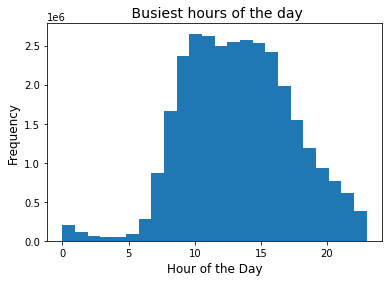

In [26]:
# Histogram to show distribution of orders throughout day

hour_freq_hist = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title(' Busiest hours of the day', fontsize = 14)
plt.xlabel('Hour of the Day', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

In [28]:
# Export histogram to folder 

hour_freq_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'hour_freq_hist_png'))

Text(0.5, 0, 'No. of orders')

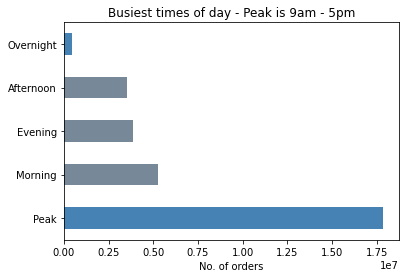

In [31]:
# Horizontal Bar to show peak time of day and best times to target ads to increase order volume 

bar_time_flag = df['Time_of_day_flag'].value_counts().plot.barh(color = ['steelblue', 'lightslategrey','lightslategrey','lightslategrey','steelblue',])
plt.title('Busiest times of day - Peak is 9am - 5pm')
plt.xlabel('No. of orders')

In [30]:
# Export horizontal bar to folder

bar_time_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_time_flag'))

Text(0, 0.5, 'No. of orders')

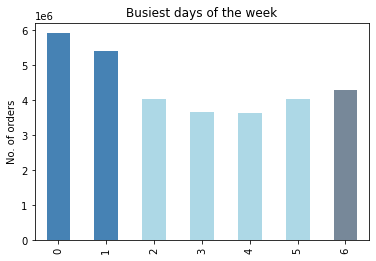

In [36]:
# Show busiest days of the week using bar chart 

bar_days = df['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['steelblue', 'steelblue','lightblue', 'lightblue', 'lightblue', 'lightblue','lightslategrey'])
plt.title('Busiest days of the week')
plt.ylabel('No. of orders')

In [51]:
# Export bar to folder

bar_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_days'))

In [37]:
df.groupby('Weekend_flag')['order_hour_of_day'].value_counts()

Weekend_flag  order_hour_of_day
Weekday       10                   1629615
              11                   1618945
              14                   1600172
              15                   1593625
              13                   1573793
              12                   1548540
              16                   1542512
              9                    1453196
              17                   1289762
              8                    1042219
              18                   1038335
              19                    801356
              20                    611457
              7                     574387
              21                    502406
              22                    404354
              23                    262369
              6                     196525
              0                     135516
              1                      71114
              5                      59677
              2                      43361
              4       

In [46]:
# Is there a difference to ordering habits on the weekend?

crosstab_weekend_hours = pd.crosstab(df['order_hour_of_day'],df['Weekend_flag'])
crosstab_weekend_hours.to_clipboard()

In [47]:
# Do the weekdays differ in ordering habits?

crosstab_day_hours = pd.crosstab(df['order_hour_of_day'],df['order_day_of_week'])
crosstab_day_hours.to_clipboard()

# 03 Is there a time of day when people spend more money?

In [54]:
df.groupby('order_hour_of_day').agg({'prices':['median','mean']})

prices          
                  median      mean
order_hour_of_day                 
0                    7.4  7.811140
1                    7.4  7.805799
2                    7.4  7.802488
3                    7.5  7.828424
4                    7.5  7.840929
5                    7.5  7.830000
6                    7.4  7.818849
7                    7.4  7.820503
8                    7.4  7.789009
9                    7.3  7.751135
10                   7.3  7.747307
11                   7.3  7.769311
12                   7.4  7.789116
13                   7.4  7.792066
14                   7.4  7.801575
15                   7.4  7.804501
16                   7.4  7.801075
17                   7.4  7.806123
18                   7.4  7.808081
19                   7.4  7.793442
20                   7.4  7.799472
21                   7.4  7.804924
22                   7.4  7.816106
23                   7.4  7.795952

In [55]:
df.groupby('Time_of_day_flag').agg({'prices':['median','mean']})

prices          
                 median      mean
Time_of_day_flag                 
Afternoon           7.4  7.806982
Evening             7.4  7.800943
Morning             7.4  7.779395
Overnight           7.4  7.813629
Peak                7.4  7.786018

In [57]:
df.groupby('order_day_of_week').agg({'prices':['median','mean']})

prices          
                  median      mean
order_day_of_week                 
0                    7.5  7.857027
1                    7.3  7.756847
2                    7.3  7.753440
3                    7.3  7.756124
4                    7.3  7.755473
5                    7.3  7.760249
6                    7.5  7.856932

# 04 Suggest smaller price range groupings for targeting marketing campaigns

In [58]:
df.groupby('product_price_range').agg({'prices':['median','mean']})

prices           
                    median       mean
product_price_range                  
High range product    20.8  20.378565
Low range product      3.1   3.023833
Mid range product      9.5   9.756778

In [61]:
crosstab_price_range = pd.crosstab(df['product_price_range'],df['High/Low_Spender'])
crosstab_price_range.to_clipboard()

# 05 Are there certain types of products that are more popular than others? 

In [65]:
df.groupby('department_id').agg({'order_number':['median','mean','max','min']})

order_number                   
                    median       mean max min
department_id                                
1.0                   10.0  16.160731  99   1
2.0                   12.0  18.096481  99   1
3.0                   12.0  17.856619  99   1
4.0                   12.0  18.495724  99   1
5.0                   10.0  16.034226  99   1
6.0                   11.0  17.174694  99   1
7.0                   12.0  17.901479  99   1
8.0                   11.0  15.995927  99   1
9.0                   11.0  16.633019  99   1
10.0                  14.0  20.797555  99   1
11.0                  11.0  16.933392  99   1
12.0                  11.0  16.576910  99   1
13.0                  11.0  17.328319  99   1
14.0                  11.0  17.469987  99   1
15.0                  11.0  16.933858  99   1
16.0                  12.0  18.324692  99   1
17.0                  11.0  16.438892  99   1
18.0                  14.0  19.867090  99   1
19.0                  12.0  17.830354  99   1
20.0                  11.0  17.144802  99   1
21.0                  18.0  24.281327  99   1

In [68]:
# Create crosstab to further analyse department id 18 (babies)

crosstab_babies_dept = pd.crosstab(df['department_id']==18, df['Order_frequency_flag'], dropna = False)
crosstab_babies_dept

Order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department_id,,,
False,20906508,2872183,6804406
True,316136,25287,68969


# 06 Do different types of customers have different ordering behaviors?

In [70]:
# Create crosstab to look into income ranges and departments

crosstab_income_flag_dept = pd.crosstab(df['department_id'], df['income_flag'], dropna = False)
crosstab_income_flag_dept

income_flag,Average income,High income,Low income,Very high income
department_id,,,,
1.0,1074462,522162,505256,19852
2.0,17193,8252,8495,471
3.0,568258,278203,261763,12604
4.0,4685350,2243873,2100660,49393
5.0,66878,34972,36650,6127
6.0,133456,63409,57089,2037
7.0,1215502,594695,737043,24661
8.0,46492,23092,21593,1883
9.0,431141,206331,177781,6883


In [71]:
crosstab_income_flag_dept.to_clipboard()

In [73]:
crosstab_income_flag_price_range = pd.crosstab(df['product_price_range'], df['income_flag'], dropna = False)
crosstab_income_flag_price_range

income_flag,Average income,High income,Low income,Very high income
product_price_range,,,,
High range product,215450,106004,70507,5992
Low range product,4619279,2228817,2747863,78883
Mid range product,10715240,5164160,4843108,169267


In [74]:
crosstab_income_flag_price_range.to_clipboard()

# 07 Brand loyalty

In [79]:
df['loyalty_flag'].value_counts(dropna = False)


Regular customer    15891507
Loyal customer      10294027
New customer         4807955
Name: loyalty_flag, dtype: int64

In [91]:
crosstab_loyalty_regions = pd.crosstab(df['Region'], df['loyalty_flag'], dropna = False)
crosstab_loyalty_regions
crosstab_loyalty_regions.to_clipboard()

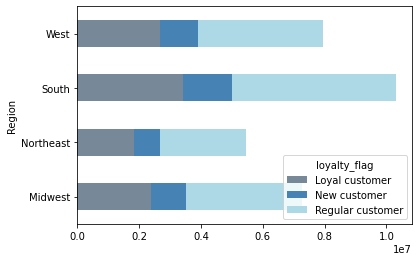

In [90]:
region_loyalty_bar = crosstab_loyalty_regions.plot.barh(stacked = True, color = ['lightslategrey','steelblue', 'lightblue'])

In [93]:
crosstab_loyalty_income = pd.crosstab(df['income_flag'], df['loyalty_flag'], dropna = False)
crosstab_loyalty_income
crosstab_loyalty_income.to_clipboard()

# 08 Family Status insights

In [95]:
crosstab_dept_family = pd.crosstab(df['Family_flag'], df['department_id'], dropna = False)
crosstab_dept_family
crosstab_dept_family.to_clipboard()

In [96]:
# Create crosstab to further analyse department id 18 (babies) and family_flag

crosstab_babies_dept_fam = pd.crosstab(df['department_id']==18, df['Family_flag'], dropna = False)
crosstab_babies_dept_fam

Family_flag,Family,Individual
department_id,,
False,22939242,7643855
True,307064,103328


In [97]:
# Create crosstab to further analyse individual and no_of_dependants

crosstab_babies_dependants_fam = pd.crosstab(df['No_of_dependants'], df['Family_flag'], dropna = False)
crosstab_babies_dependants_fam

Family_flag,Family,Individual
No_of_dependants,,
0,0,7747183
1,7726129,0
2,7740539,0
3,7779638,0


In [100]:
# Is there a correlation between family status and spending power?

crosstab_dept_family = pd.crosstab(df['Family_flag'], df['income_flag'], dropna = False)
crosstab_dept_family
crosstab_dept_family.to_clipboard()

In [101]:
# Is there a correlation between family status and day order is placed?

crosstab_day_flag_family = pd.crosstab(df['Family_flag'], df['Weekend_flag'], dropna = False)
crosstab_day_flag_family
crosstab_day_flag_family.to_clipboard()

In [102]:
# Is there a correlation between family status and day order is placed?

crosstab_day_flag_family = pd.crosstab(df['Family_status'], df['Weekend_flag'], dropna = False)
crosstab_day_flag_family
crosstab_day_flag_family.to_clipboard()

In [104]:
# Is there a correlation between number of children and day order is placed?

crosstab_day_No_dependants = pd.crosstab(df['No_of_dependants'], df['Weekend_flag'], dropna = False)
crosstab_day_No_dependants.to_clipboard()

In [105]:
# Is there a correlation between family status and time of day order is placed?

crosstab_time_family = pd.crosstab(df['Family_flag'], df['Time_of_day_flag'], dropna = False)
crosstab_time_family.to_clipboard()

In [106]:
# Is there a correlation between region and spending?

crosstab_spend_region = pd.crosstab(df['Region'], df['High/Low_Spender'], dropna = False)
crosstab_spend_region.to_clipboard()

In [108]:
# Is there a correlation between region and family status?

crosstab_fam_region = pd.crosstab(df['Region'], df['Family_flag'], dropna = False)
crosstab_fam_region.to_clipboard()

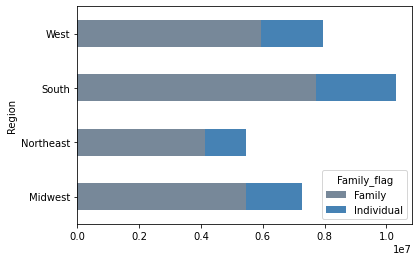

In [109]:
fam_region_bar = crosstab_fam_region.plot.barh(stacked = True, color = ['lightslategrey','steelblue'])

In [110]:
# Is there a correlation between region and family status?

crosstab_fam_status_region = pd.crosstab(df['Region'], df['Family_status'], dropna = False)
crosstab_fam_status_region.to_clipboard()

In [111]:
# Is there a correlation between region and income?

crosstab_income_region = pd.crosstab(df['Region'], df['income_flag'], dropna = False)
crosstab_income_region.to_clipboard()

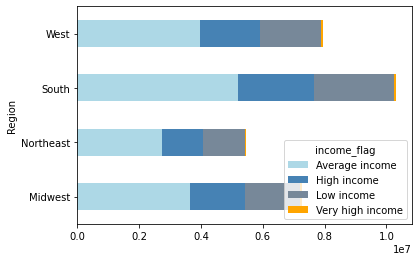

In [113]:
income_region_bar = crosstab_income_region.plot.barh(stacked = True, color = ['lightblue', 'steelblue', 'lightslategrey','orange'])

In [116]:
# Do age and family status affect ordering habits ?

df.groupby('age_range').agg({'order_number':['median','mean']})

order_number           
                median       mean
age_range                        
18-34             12.0  17.816112
35-49             12.0  17.906241
50-64             12.0  17.836956
65+               12.0  17.783976

In [121]:
# Is there a correlation between order frequency and family status?

crosstab_freq_age = pd.crosstab(df['age_range'], df['Order_frequency_flag'], dropna = False)
crosstab_freq_age.to_clipboard()

Text(0.5, 0, 'Order frequency')

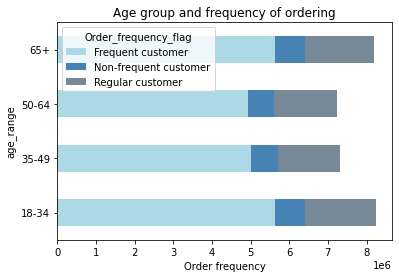

In [123]:
age_frequency_bar = crosstab_freq_age.plot.barh(stacked = True, color = ['lightblue', 'steelblue', 'lightslategrey'])
plt.title('Age group and frequency of ordering')
plt.xlabel('Order frequency')

In [126]:
# Is there a correlation between age and family status?

crosstab_fam_stat_age = pd.crosstab(df['Family_status'], df['age_range'], dropna = False)
crosstab_fam_stat_age.to_clipboard()

Text(0, 0.5, '')

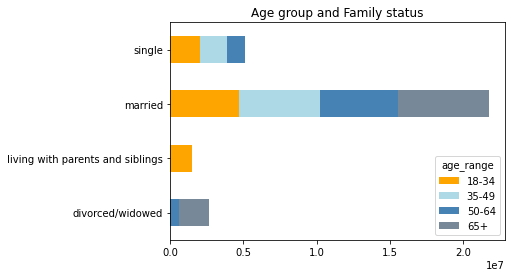

In [130]:
age_status_bar = crosstab_fam_stat_age.plot.barh(stacked = True, color = ['orange','lightblue', 'steelblue', 'lightslategrey'])
plt.title('Age group and Family status')
plt.ylabel('')